### Imports

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from colorsetup import colors, palette

### Read the data

In [112]:
gcr_data = pd.read_csv("german_credit_data.csv", index_col=0)

In [113]:
gcr_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


1 -> Good <br>
0 -> Bad

In [114]:
y = (gcr_data['Risk']=='good').astype(int)
correlations = gcr_data[list(gcr_data.columns[:-1])].corrwith(y)
correlations.sort_values(inplace=True)
correlations

Duration        -0.214927
Credit amount   -0.154739
Job             -0.032735
Age              0.091127
dtype: float64

In [115]:
sns.set_context('talk')
sns.set_palette(palette)
sns.set_style('white')

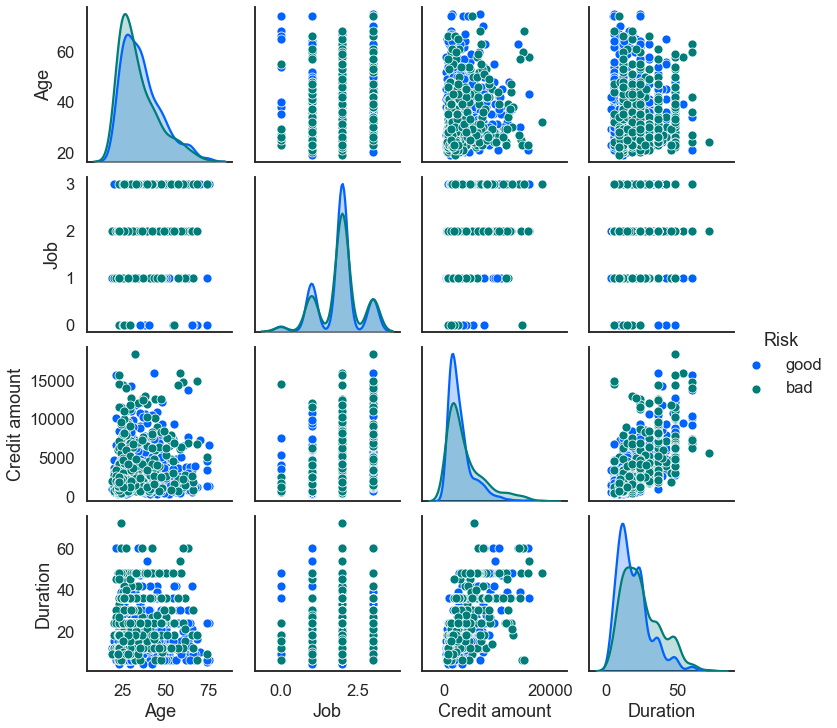

In [116]:
sns.pairplot(gcr_data, hue='Risk')

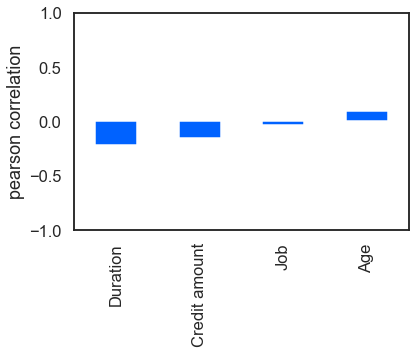

In [117]:
ax = correlations.plot(kind='bar', color=colors[0])
ax.set(ylim=[-1, 1], ylabel='pearson correlation');

In [118]:
correlations.map(abs).sort_values().iloc[-2:].index

Index(['Credit amount', 'Duration'], dtype='object')

In [119]:
gcr_data.dtypes.value_counts()

object    6
int64     4
dtype: int64

In [120]:
gcr_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 125.9+ KB


In [121]:
gcr_data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [122]:
gcr_data.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

#### For Handling Missing Values
https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4

In [123]:
from sklearn.impute import SimpleImputer
values = gcr_data.values 
imputer = SimpleImputer(missing_values= np.nan, strategy='most_frequent') 
transformed_values = imputer.fit_transform(values) 

# strategy can be changed to "median" and “most_frequent”


In [124]:
transformed_values.shape

(1000, 10)

In [125]:
gcr_data_imputed = pd.DataFrame(transformed_values, columns=gcr_data.columns)

In [126]:
gcr_data_imputed.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [127]:
gcr_data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   object
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   object
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   object
 7   Duration          1000 non-null   object
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: object(10)
memory usage: 78.2+ KB


In [128]:
gcr_data_imputed["Credit amount"] = gcr_data_imputed["Credit amount"].astype(int)
gcr_data_imputed["Duration"] = gcr_data_imputed["Duration"].astype(int)
gcr_data_imputed["Job"] = gcr_data_imputed["Job"].astype(int)
gcr_data_imputed["Age"] = gcr_data_imputed["Age"].astype(int)

In [129]:
y = (gcr_data_imputed['Risk']=='good').astype(int)
correlations = gcr_data_imputed[list(gcr_data_imputed.columns[:-1])].corrwith(y)
correlations.sort_values(inplace=True)
correlations

Duration        -0.214927
Credit amount   -0.154739
Job             -0.032735
Age              0.091127
dtype: float64

<AxesSubplot:>

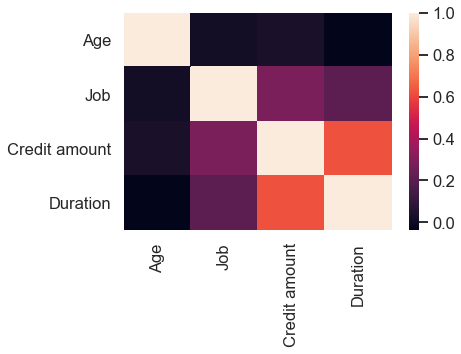

In [130]:
sns.heatmap(gcr_data_imputed.corr())

In [131]:
corr_values = gcr_data_imputed[list(gcr_data_imputed.columns[:-1])].corr()

tril_index = np.tril_indices_from(corr_values)
#display(tril_index)

for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN

corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

In [132]:
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.6')

,feature1,feature2,correlation,abs_correlation
5,Credit amount,Duration,0.624984,0.624984


In [133]:
'''
from fancyimpute import KNN    
# Use 5 nearest rows which have a feature to fill in each row's missing features
knnOutput = KNN(k=5, metric='hamming').fit_transform(gcr_data)
'''

"\nfrom fancyimpute import KNN    \n# Use 5 nearest rows which have a feature to fill in each row's missing features\nknnOutput = KNN(k=5, metric='hamming').fit_transform(gcr_data)\n"

In [134]:
gcr_data_imputed.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

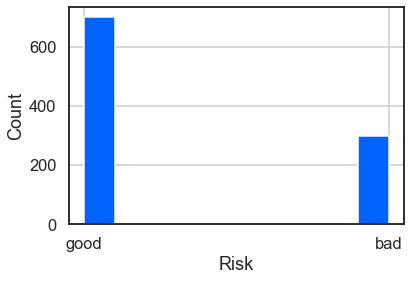

In [135]:
plt.figure()
gcr_data_imputed["Risk"].hist()
plt.xlabel("Risk")
plt.ylabel("Count")
plt.show()

### Glance at the Categorical Features

#### One-hot-encoding

In [136]:
mask = gcr_data_imputed.select_dtypes(include=['object'])
cat_cols = mask.columns
for col in cat_cols:
    print('{}: {}'.format(col, gcr_data_imputed[col].unique()))

Sex: ['male' 'female']
Housing: ['own' 'free' 'rent']
Saving accounts: ['little' 'quite rich' 'rich' 'moderate']
Checking account: ['little' 'moderate' 'rich']
Purpose: ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Risk: ['good' 'bad']


In [137]:
cat_cols

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose',
       'Risk'],
      dtype='object')

In [138]:
binary_cols = ['Sex', 'Risk']

In [139]:
numeric_cols = ['Credit amount']

array([[<AxesSubplot:title={'center':'Credit amount'}>]], dtype=object)

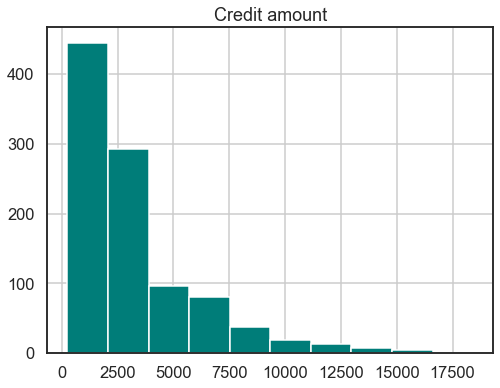

In [140]:
gcr_data_imputed[numeric_cols].hist(color=colors[1], figsize=(8, 6))

In [141]:
ordinal_cols = ['Saving accounts', 'Checking account', 'Age', 'Job']

In [142]:
ordinal_cols.append('Duration')

In [143]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder

In [144]:
lb, le = LabelBinarizer(), LabelEncoder()

In [145]:
for column in ordinal_cols:
    gcr_data_imputed[column] = le.fit_transform(gcr_data_imputed[column])

In [146]:
gcr_data_imputed[ordinal_cols].astype('category').describe()

,Saving accounts,Checking account,Age,Job,Duration
count,1000,1000,1000,1000,1000
unique,4,3,53,4,33
top,0,0,8,2,17
freq,786,668,51,630,184


In [147]:
for column in binary_cols:
    gcr_data_imputed[column] = lb.fit_transform(gcr_data_imputed[column])

In [148]:
lb.classes_

array(['bad', 'good'], dtype='<U4')

In [149]:
non_ordinal_cols = list(set(cat_cols) - set(ordinal_cols) - set(binary_cols))
non_ordinal_cols

['Purpose', 'Housing']

In [150]:
one_hot_df = pd.get_dummies(gcr_data_imputed, columns=non_ordinal_cols)

In [151]:
one_hot_df.head()

,Age,Sex,Job,Saving accounts,Checking account,Credit amount,Duration,Risk,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Housing_free,Housing_own,Housing_rent
0,48,1,2,0,0,1169,2,1,0,0,0,0,0,1,0,0,0,1,0
1,3,0,2,0,1,5951,29,0,0,0,0,0,0,1,0,0,0,1,0
2,30,1,1,0,0,2096,8,1,0,0,0,1,0,0,0,0,0,1,0
3,26,1,2,0,0,7882,26,1,0,0,0,0,1,0,0,0,1,0,0
4,34,1,2,0,0,4870,17,0,0,1,0,0,0,0,0,0,1,0,0


In [152]:
correlations = one_hot_df[list(one_hot_df.drop(columns='Risk'))].corrwith(y)
correlations.sort_values(inplace=True)
correlations

Duration                      -0.215811
Credit amount                 -0.154739
Housing_rent                  -0.092785
Housing_free                  -0.081556
Checking account              -0.052375
Purpose_education             -0.049085
Purpose_business              -0.036129
Job                           -0.032735
Purpose_vacation/others       -0.028058
Purpose_car                   -0.022621
Purpose_furniture/equipment   -0.020971
Purpose_repairs               -0.020828
Purpose_domestic appliances   -0.008016
Sex                            0.075493
Age                            0.091104
Saving accounts                0.102751
Purpose_radio/TV               0.106922
Housing_own                    0.134589
dtype: float64

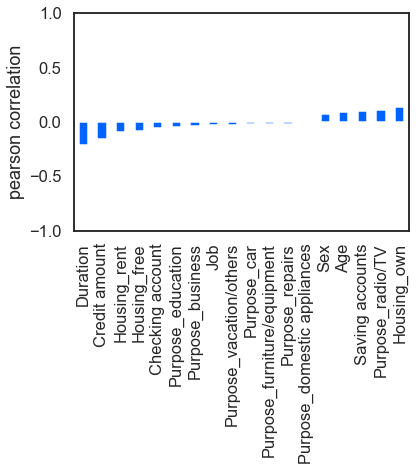

In [153]:
ax = correlations.plot(kind='bar', color=colors[0])
ax.set(ylim=[-1, 1], ylabel='pearson correlation');

In [154]:
one_hot_df.shape

(1000, 19)

In [155]:
one_hot_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,16.521,11.294473,0.0,8.0,14.0,23.00,52.0
Sex,1000.0,0.690,0.462725,0.0,0.0,1.0,1.00,1.0
Job,1000.0,1.904,0.653614,0.0,2.0,2.0,2.00,3.0
Saving accounts,1000.0,0.373,0.805307,0.0,0.0,0.0,0.00,3.0
Checking account,1000.0,0.395,0.604434,0.0,0.0,0.0,1.00,2.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,13.718,7.522703,0.0,8.0,13.0,17.00,32.0
Risk,1000.0,0.700,0.458487,0.0,0.0,1.0,1.00,1.0
Purpose_business,1000.0,0.097,0.296106,0.0,0.0,0.0,0.00,1.0
Purpose_car,1000.0,0.337,0.472921,0.0,0.0,0.0,1.00,1.0


In [156]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [157]:
for column in [ordinal_cols + numeric_cols]:
    one_hot_df[column] = mm.fit_transform(one_hot_df[column])

In [158]:
round(one_hot_df.describe().T, 3)

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,0.318,0.217,0.0,0.154,0.269,0.442,1.0
Sex,1000.0,0.690,0.463,0.0,0.000,1.000,1.000,1.0
Job,1000.0,0.635,0.218,0.0,0.667,0.667,0.667,1.0
Saving accounts,1000.0,0.124,0.268,0.0,0.000,0.000,0.000,1.0
Checking account,1000.0,0.198,0.302,0.0,0.000,0.000,0.500,1.0
Credit amount,1000.0,0.166,0.155,0.0,0.061,0.114,0.205,1.0
Duration,1000.0,0.429,0.235,0.0,0.250,0.406,0.531,1.0
Risk,1000.0,0.700,0.458,0.0,0.000,1.000,1.000,1.0
Purpose_business,1000.0,0.097,0.296,0.0,0.000,0.000,0.000,1.0
Purpose_car,1000.0,0.337,0.473,0.0,0.000,0.000,1.000,1.0


In [159]:
outputfile = 'gcr_processed.csv'
one_hot_df.to_csv(outputfile, index=False)

### Correlation

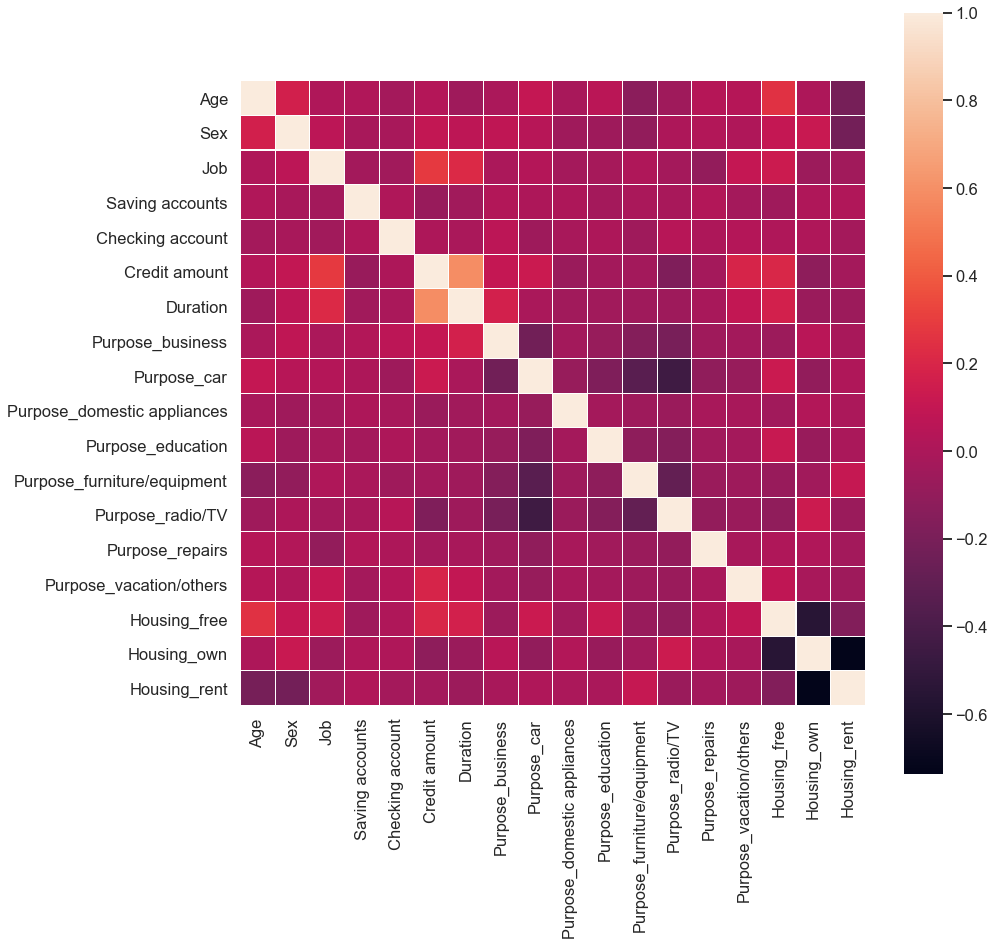

In [160]:
feature_cols = one_hot_df.drop("Risk", axis=1).columns
#print(feature_cols)

plt.figure(figsize=(14,14))
sns.heatmap(one_hot_df[feature_cols].corr(), square=True, linecolor='white', linewidths=0.1)
plt.show()

In [161]:
corr_values = one_hot_df[feature_cols].corr()
#corr_values

In [162]:
tril_index = np.tril_indices_from(corr_values)
#display(tril_index)

for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
#corr_values

In [163]:
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

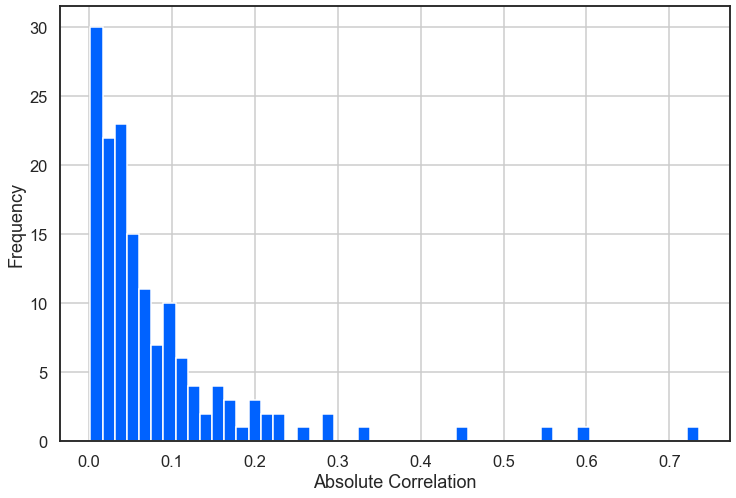

In [164]:
%matplotlib inline

sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [165]:
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.6')

,feature1,feature2,correlation,abs_correlation
152,Housing_own,Housing_rent,-0.735968,0.735968


### Preprocessing

In [166]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(one_hot_df[feature_cols], one_hot_df.Risk))

# Create the dataframes
X_train = one_hot_df.loc[train_idx, feature_cols]
y_train = one_hot_df.loc[train_idx, 'Risk']

X_test  = one_hot_df.loc[test_idx, feature_cols]
y_test  = one_hot_df.loc[test_idx, 'Risk']

In [167]:
y_train.value_counts(normalize=True)

1    0.7
0    0.3
Name: Risk, dtype: float64

In [168]:
y_test.value_counts(normalize=True)

1    0.7
0    0.3
Name: Risk, dtype: float64

## Models

### Logistic Regression: Vanilla, L1 and L2

In [169]:
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [170]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [171]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)

In [172]:
lr_l1.coef_.shape

(1, 18)

In [173]:
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1]], 
                                 codes=[[0], [0]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

,lr,l1,l2
,0,0,0
4,-0.343491,-0.100081,-0.281158
0,0.939528,0.692004,0.750129
16,0.397365,0.431096,0.397102
12,0.709687,0.573188,0.643235
11,0.163845,0.000000,0.134082
14,-0.291038,0.000000,-0.193591
1,0.316278,0.280312,0.312575
17,-0.054659,0.000000,-0.046022
10,-0.338559,-0.096293,-0.288283


In [174]:
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,lr,l1,l2
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,0,1,0


In [175]:
y_pred[y_pred.lr != y_pred.l1]

,lr,l1,l2
4,0,1,0
24,0,1,0
51,0,1,0
90,0,1,0
97,0,1,0
162,1,0,1
172,0,1,0
199,0,1,1
202,0,1,0
280,0,1,0


In [176]:
y_prob.head()

,lr,l1,l2
0,0.761688,0.754963,0.753256
1,0.712136,0.744459,0.712235
2,0.623654,0.688714,0.641351
3,0.731508,0.710515,0.713756
4,0.566491,0.520659,0.543023


The F-score, also called the F1-score, is a measure of a model’s accuracy on a dataset. It is used to evaluate binary classification systems, which classify examples into ‘positive’ or ‘negative’.

The F-score is a way of combining the precision and recall of the model, and it is defined as the harmonic mean of the model’s precision and recall.

In [177]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1]),
              label_binarize(y_pred[lab], classes=[0,1]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [178]:
metrics

,lr,l1,l2
precision,0.674545,0.658470,0.659410
recall,0.710000,0.703333,0.703333
fscore,0.647476,0.624098,0.635791
accuracy,0.710000,0.703333,0.703333
auc,0.551587,0.530952,0.540476


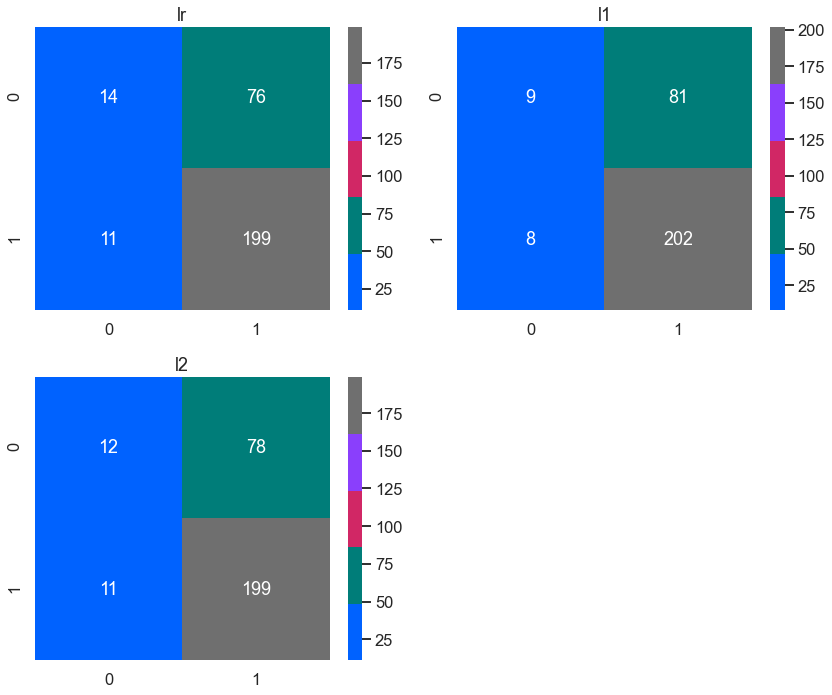

In [179]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d', cmap=colors);
    ax.set(title=lab);
    
plt.tight_layout()

### KNN

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

In [181]:
# Set up X and y variables
y, X = one_hot_df['Risk'], one_hot_df.drop(columns='Risk')

# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [182]:
# Estimate KNN model and report outcomes
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.35      0.25      0.29       118
           1       0.72      0.80      0.76       282

    accuracy                           0.64       400
   macro avg       0.53      0.53      0.53       400
weighted avg       0.61      0.64      0.62       400

Accuracy score:  0.64
F1 Score:  0.76


In [183]:
confusion_matrix(y_test, y_pred) 

array([[ 30,  88],
       [ 56, 226]], dtype=int64)

- FPR 28%

Text(0.5, 40.5, 'Ground Truth')

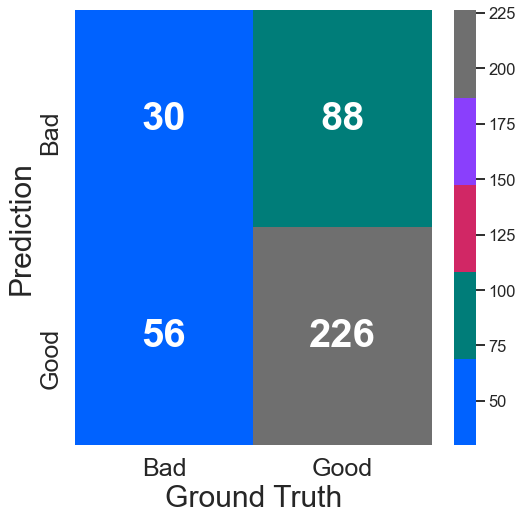

In [184]:
# Plot confusion matrix
sns.set_palette(sns.color_palette(colors))
_, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap=colors, annot_kws={"size": 40, "weight": "bold"})  
labels = ['Good', 'Bad']
ax.set_xticklabels(labels[::-1], fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

In [185]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.43      0.28      0.34       118
           1       0.74      0.84      0.79       282

    accuracy                           0.68       400
   macro avg       0.58      0.56      0.56       400
weighted avg       0.65      0.68      0.65       400

Accuracy score:  0.68
F1 Score:  0.79


Text(0.5, 40.5, 'Ground Truth')

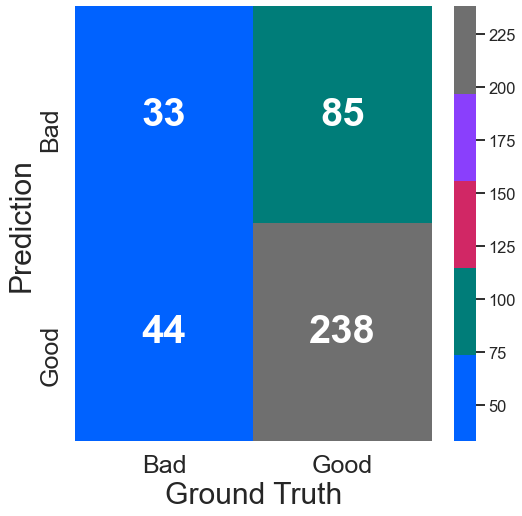

In [186]:
# Plot confusion matrix
_, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap=colors, annot_kws={"size": 40, "weight": "bold"})  
labels = ['Good', 'Bad']
ax.set_xticklabels(labels[::-1], fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

- FPR 26.31%

In [187]:
max_k = 100
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

In [188]:
f1_results.head()

,K,F1 Score
0,1,0.7548
1,2,0.7548
2,3,0.7653
3,4,0.7669
4,5,0.7868


<Figure size 1800x1200 with 0 Axes>

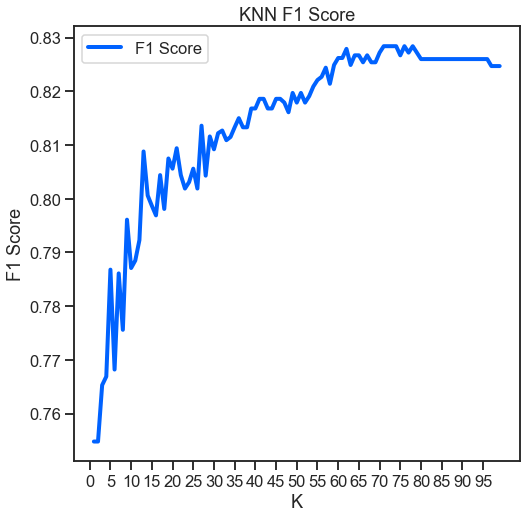

In [189]:
# Plot F1 results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(color=colors[0], figsize=(8, 8), linewidth=4)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(0, max_k, 5));
plt.title('KNN F1 Score')
plt.savefig('knn_f1.png')

<Figure size 1800x1200 with 0 Axes>

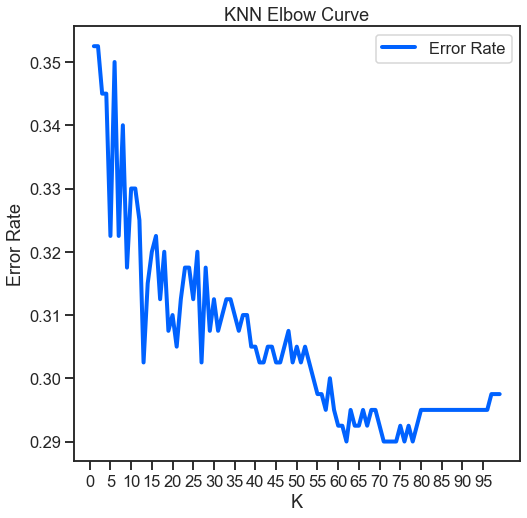

In [190]:
# Plot Accuracy (Error Rate) results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(color=colors[0], figsize=(8, 8), linewidth=4)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(0, max_k, 5))
plt.title('KNN Elbow Curve')
plt.savefig('knn_elbow.png')

In [191]:
knn = KNeighborsClassifier(n_neighbors=62, weights='distance')
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.62      0.04      0.08       118
           1       0.71      0.99      0.83       282

    accuracy                           0.71       400
   macro avg       0.67      0.52      0.45       400
weighted avg       0.69      0.71      0.61       400

Accuracy score:  0.71
F1 Score:  0.83


Text(0.5, 40.5, 'Ground Truth')

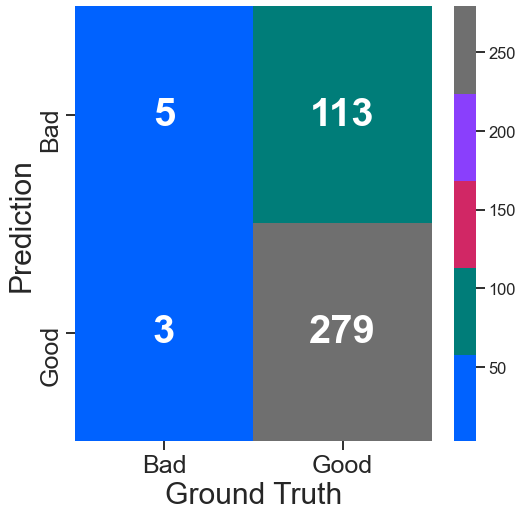

In [192]:
# Plot confusion matrix
_, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap=colors, annot_kws={"size": 40, "weight": "bold"})  
labels = ['Good', 'Bad']
ax.set_xticklabels(labels[::-1], fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

- FPR 28.8%

### SVC

In [193]:
y = (one_hot_df['Risk'] == 1).astype(int)
correlations = one_hot_df[list(one_hot_df.drop(columns='Risk'))].corrwith(y)
correlations.sort_values(inplace=True)
correlations

Duration                      -0.215811
Credit amount                 -0.154739
Housing_rent                  -0.092785
Housing_free                  -0.081556
Checking account              -0.052375
Purpose_education             -0.049085
Purpose_business              -0.036129
Job                           -0.032735
Purpose_vacation/others       -0.028058
Purpose_car                   -0.022621
Purpose_furniture/equipment   -0.020971
Purpose_repairs               -0.020828
Purpose_domestic appliances   -0.008016
Sex                            0.075493
Age                            0.091104
Saving accounts                0.102751
Purpose_radio/TV               0.106922
Housing_own                    0.134589
dtype: float64

In [194]:
correlations.map(abs).sort_values().iloc[-2:].index

Index(['Credit amount', 'Duration'], dtype='object')

In [195]:
from sklearn.preprocessing import MinMaxScaler

fields = correlations.map(abs).sort_values().iloc[-2:].index
print(fields)
X = one_hot_df[fields]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['%s_scaled' % fld for fld in fields])
print(X.columns)

Index(['Credit amount', 'Duration'], dtype='object')
Index(['Credit amount_scaled', 'Duration_scaled'], dtype='object')


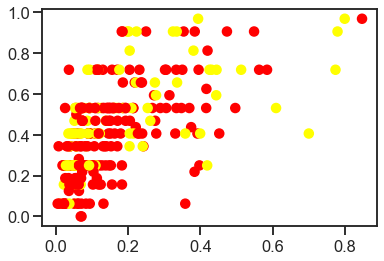

In [196]:
from sklearn.svm import LinearSVC

LSVC = LinearSVC()
LSVC.fit(X, y)

X_color = X.sample(300, random_state=45)
y_color = y.loc[X_color.index]
y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
ax = plt.axes()
ax.scatter(
    X_color.iloc[:, 0], X_color.iloc[:, 1],
    color=y_color, alpha=1)

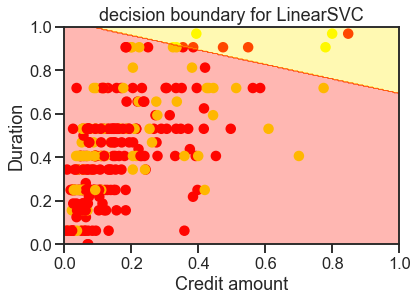

In [197]:
from sklearn.svm import LinearSVC

LSVC = LinearSVC()
LSVC.fit(X, y)

X_color = X.sample(300, random_state=45)
y_color = y.loc[X_color.index]
y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
ax = plt.axes()
ax.scatter(
    X_color.iloc[:, 0], X_color.iloc[:, 1],
    color=y_color, alpha=1)
# -----------
x_axis, y_axis = np.arange(0, 1.005, .005), np.arange(0, 1.005, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = LSVC.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
# -----------
ax.set(
    xlabel=fields[0],
    ylabel=fields[1],
    xlim=[0, 1],
    ylim=[0, 1],
    title='decision boundary for LinearSVC');

### Decision Trees

In [198]:
feature_cols = [x for x in one_hot_df.columns if x not in 'Risk']

In [199]:
from sklearn.model_selection import StratifiedShuffleSplit

# Split the data into two parts with 400 points in the test data
# This creates a generator
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=300, random_state=42)

# Get the index values from the generator
train_idx, test_idx = next(strat_shuff_split.split(one_hot_df[feature_cols], one_hot_df['Risk']))

# Create the data sets
X_train = one_hot_df.loc[train_idx, feature_cols]
y_train = one_hot_df.loc[train_idx, 'Risk']

X_test = one_hot_df.loc[test_idx, feature_cols]
y_test = one_hot_df.loc[test_idx, 'Risk']

In [200]:
y_train.value_counts(normalize=True).sort_index()

0    0.3
1    0.7
Name: Risk, dtype: float64

In [201]:
y_test.value_counts(normalize=True).sort_index()

0    0.3
1    0.7
Name: Risk, dtype: float64

In [202]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

In [203]:
dt.tree_.node_count, dt.tree_.max_depth

(367, 20)

In [204]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [205]:
# The error on the training and test data sets
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,1.0,0.623333
precision,1.0,0.746193
recall,1.0,0.700000
f1,1.0,0.722359


In [206]:
from sklearn.model_selection import GridSearchCV

# hyperparameters
param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2), 
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)

In [207]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(13, 3)

In [208]:
y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'),
                                 measure_error(y_test, y_test_pred_gr, 'test')],
                                axis=1)

train_test_gr_error

,train,test
accuracy,0.745714,0.710000
precision,0.740000,0.718861
recall,0.981633,0.961905
f1,0.843860,0.822811


#### For predicting missing values

In [209]:
feature_cols = [x for x in one_hot_df.columns if x != 'Credit amount']

# Create the data sets
X_train = one_hot_df.loc[train_idx, feature_cols]
y_train = one_hot_df.loc[train_idx, 'Credit amount']

X_test = one_hot_df.loc[test_idx, feature_cols]
y_test = one_hot_df.loc[test_idx, 'Credit amount']

In [210]:
gcr_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [211]:
from sklearn.tree import DecisionTreeRegressor

dr = DecisionTreeRegressor().fit(X_train, y_train)

param_grid = {'max_depth':range(1, dr.tree_.max_depth+1, 2),
              'max_features': range(1, len(dr.feature_importances_)+1)}

GR_sugar = GridSearchCV(DecisionTreeRegressor(random_state=42),
                     param_grid=param_grid,
                     scoring='neg_mean_squared_error',
                      n_jobs=-1)

GR_sugar = GR_sugar.fit(X_train, y_train)

In [212]:
GR_sugar.best_estimator_.tree_.node_count, GR_sugar.best_estimator_.tree_.max_depth

(15, 3)

In [213]:
from sklearn.metrics import mean_squared_error

y_train_pred_gr_sugar = GR_sugar.predict(X_train)
y_test_pred_gr_sugar  = GR_sugar.predict(X_test)

train_test_gr_sugar_error = pd.Series({'train': mean_squared_error(y_train, y_train_pred_gr_sugar),
                                         'test':  mean_squared_error(y_test, y_test_pred_gr_sugar)},
                                          name='MSE').to_frame().T

train_test_gr_sugar_error

,train,test
MSE,0.013192,0.015672


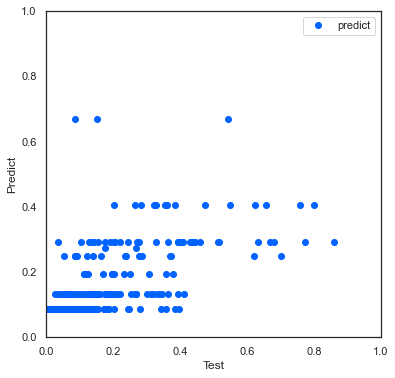

In [214]:
sns.set_context('notebook')
sns.set_style('white')
fig = plt.figure(figsize=(6,6))
ax = plt.axes()

ph_test_predict = pd.DataFrame({'test':y_test.values,
                                'predict': y_test_pred_gr_sugar}).set_index('test').sort_index()

ph_test_predict.plot(marker='o', ls='', ax=ax)
ax.set(xlabel='Test', ylabel='Predict', xlim=(0,1), ylim=(0,1));

In [215]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

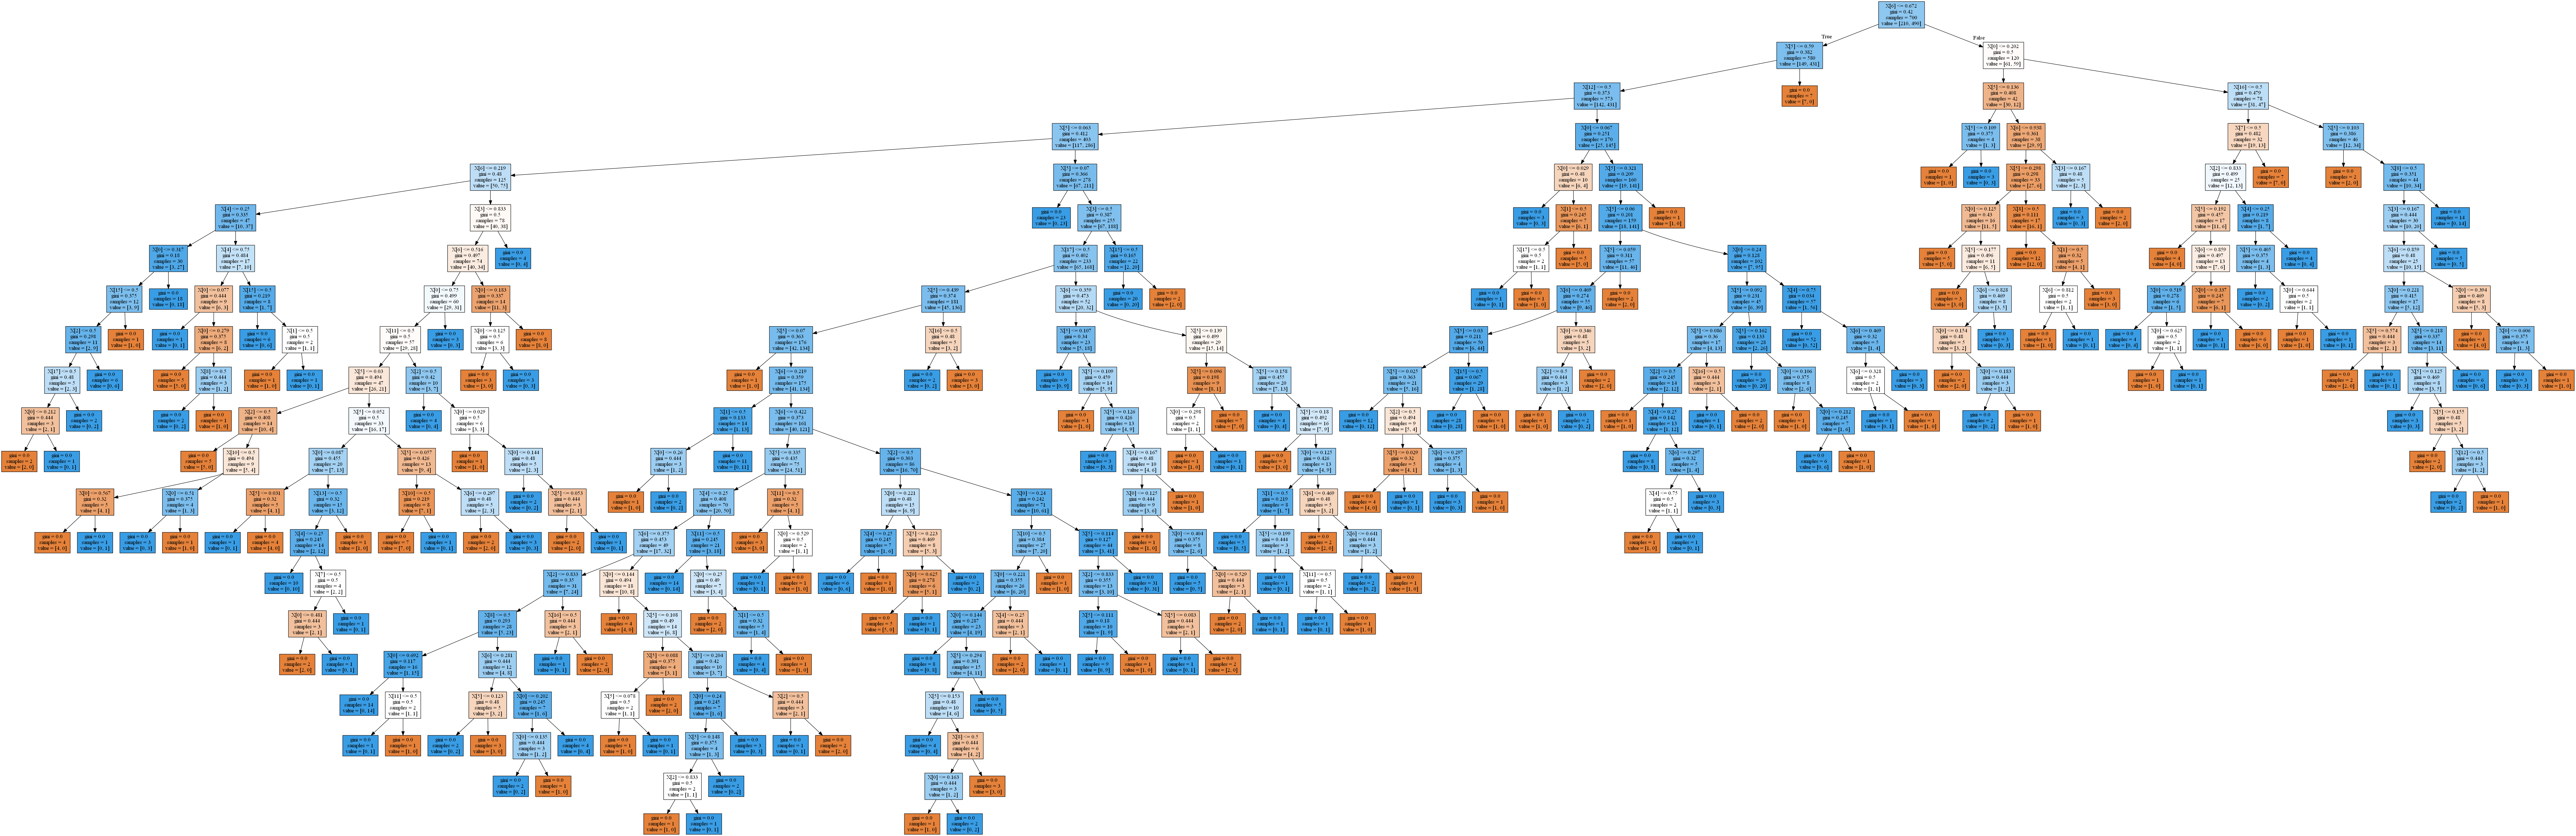

In [216]:
# Create an output destination for the file
dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# View the tree image
filename = 'gcr_target_tree.png'
graph.write_png(filename)
Image(filename=filename)

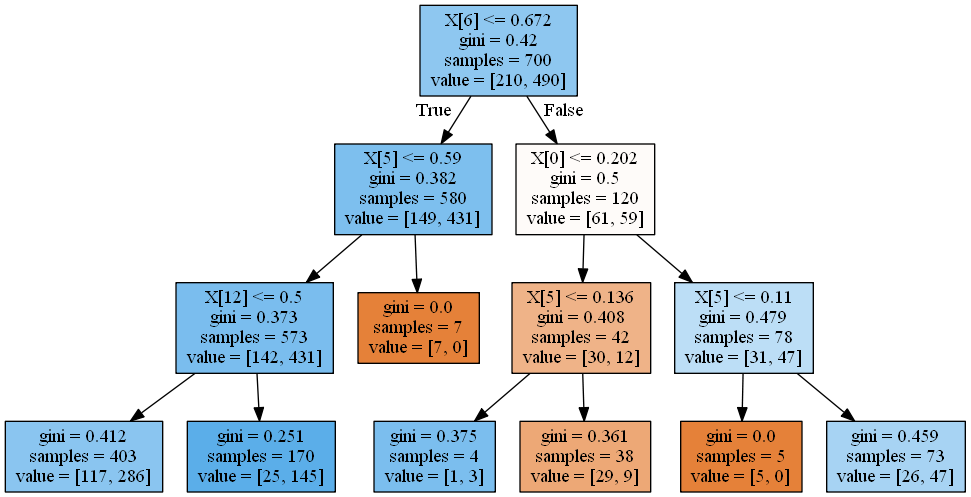

In [217]:
# Create an output destination for the file
dot_data = StringIO()

export_graphviz(GR.best_estimator_, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# View the tree image
filename = 'gcr_target_tree_prune.png'
graph.write_png(filename)
Image(filename=filename)

- Gini index or Gini impurity measures the degree or probability of a particular variable being wrongly classified when it is randomly chosen.
- The degree of Gini index varies between 0 and 1, where 0 denotes that all elements belong to a certain class or if there exists only one class, and 1 denotes that the elements are randomly distributed across various classes. 
- A Gini Index of 0.5 denotes equally distributed elements into some classes.
- Formula for Gini Index

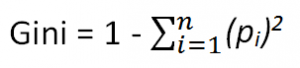
- where pi  is the probability of an object being classified to a particular class.
- While building the decision tree, we would prefer choosing the attribute/feature with the least Gini index as the root node.
- Gini Index, unlike information gain, isn’t computationally intensive as it doesn’t involve the logarithm function used to calculate entropy in information gain, which is why Gini Index is preferred over Information gain.

For info: https://blog.quantinsti.com/gini-index/#:~:text=Gini%20index%20or%20Gini%20impurity,it%20can%20be%20called%20pure.